In [1]:
package = "../../"
import sys
import os
package = os.path.abspath(package)
sys.path.append(package)


In [2]:
import numpy as np
import torch
import logging
import sys
import os
import glob
from qflux.trainer.dreamomni2_trainer import DreamOmni2Trainer
from qflux.data.config import load_config_from_yaml
from qflux.data.dataset import loader
from diffusers.utils import load_image

Environment variables loaded from .env file


Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


Logged in to Hugging Face


In [3]:
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s | %(levelname)s | %(name)s: %(message)s",
    handlers=[logging.StreamHandler(sys.stdout)],
    force=True,  # 关键：覆盖已有配置
)
logger = logging.getLogger(__name__)
logger.info("it works")


2025-11-02 22:32:26,973 | INFO | __main__: it works


In [4]:
config="../../../tests/test_configs/test_dreamomni2_fp16.yaml"
config = load_config_from_yaml(config)
trainer = DreamOmni2Trainer(config)

2025-11-02 22:32:27,026 | INFO | qflux.trainer.base_trainer: Batch Size: 2
2025-11-02 22:32:27,027 | INFO | qflux.trainer.base_trainer: Use Cache: True
2025-11-02 22:32:27,029 | INFO | root: ImageProcessor initialized with target_size: (832, 576)controls_size: [(832, 576)]target_pixels: Nonecontrols_pixels: None


In [5]:
import requests
from PIL import Image
from io import BytesIO

image_file="https://cdna.artstation.com/p/assets/images/images/027/134/318/large/pang-ying-ep03-scene-sc037.jpg?1590684056"
image_file = '/mnt/nas/public2/lilong/data/openimages/character_composition/test/control/scene_girl.png'
image_file = '/mnt/nas/public2/lilong/data/openimages/character_composition/test/control/living_room_honey_small.webp'
iamge_file = '/mnt/nas/public2/lilong/data/openimages/character_composition/test/control/living_room_dog.webp'
control_1 = load_image(image_file).convert('RGB')

import requests
from io import BytesIO
from PIL import Image
# control_1 = load_image('https://cdn.shopify.com/s/files/1/0705/5491/0959/files/100_dfdf593d-bc73-4bb5-8d23-9181d510f628_480x480.webp')
# control_1 = load_image('/mnt/nas/public2/lilong/data/openimages/character_composition/test/control/scene_girl_control_1.webp')
# control_1 = load_image('/mnt/nas/public2/lilong/data/openimages/character_composition/test/control/living_room_honey_small_control_1.png')
control_2 = load_image('/mnt/nas/public2/lilong/data/openimages/character_composition/test/control/living_room_dog_control_1.webp')
prompt='Add the character to the image'
prompt

'Add the character to the image'

In [6]:
prompt='the dog in imgae 2 are sitting near the sofa of image 1, keep the background of image 1 do not change'


In [20]:
out = trainer.predict(
    image=[control_1, control_2],
    prompt=prompt,
    num_inference_steps=20,
    true_cfg_scale=1.0,
    negative_prompt="",
    weight_dtype=torch.bfloat16,
    height=768,
    width=1344,
    controls_size=[[768,1344],[512,512]],
    additional_controls=[[control_1]],
    output_type='pil',
)
# save_path = 'tests/test_flux_kontext_trainer.png'
# save_path = os.path.abspath(save_path)

2025-11-02 22:35:03,200 | INFO | root: Start predict
2025-11-02 22:35:03,201 | INFO | root: image size format [H,W]
controls_size [[768, 1344], [512, 512]]
2025-11-02 22:35:03,203 | INFO | root: ##################################################
2025-11-02 22:35:03,203 | INFO | root: image shapes for controls: [[768, 1344], [512, 512]]
2025-11-02 22:35:03,203 | INFO | root: image shape for target: [768, 1344]


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


control_1 <class 'list'> <class 'torch.Tensor'> <class 'torch.Tensor'>
new controls torch.Size([1, 3, 512, 512]) control_1
data keys dict_keys(['control', 'prompt', 'control_1', 'n_controls', 'negative_prompt', 'num_inference_steps', 'height', 'width', 'true_cfg_scale', 'guidance'])
control <class 'torch.Tensor'>
prompt <class 'list'>
control_1 <class 'torch.Tensor'>
n_controls <class 'int'>
negative_prompt <class 'list'>
num_inference_steps <class 'int'>
height <class 'int'>
width <class 'int'>
true_cfg_scale <class 'float'>
guidance <class 'float'>
2025-11-02 22:35:07,107 | INFO | root: Original prompt: the dog in imgae 2 are sitting near the sofa of image 1, keep the background of image 1 do not change
2025-11-02 22:35:07,108 | INFO | root: Optimized prompt: <gen> [instruction]: Place the dog (image_2) sitting on the floor near the blue sofa with yellow pillows, positioned between the blue and red sofas., [caption]: The dog has a light brown coat with a soft, fluffy texture, sitting

Flux Kontext Generation:   0%|          | 0/20 [00:00<?, ?it/s]

In [8]:
# save_folder=''

In [15]:
# trainer.accelerator=None

In [16]:
# trainer.save_lora('/mnt/nas/public2/lilong/data/checkpoints/saved/nas/dreamonmni2/', adapter_name='edit')

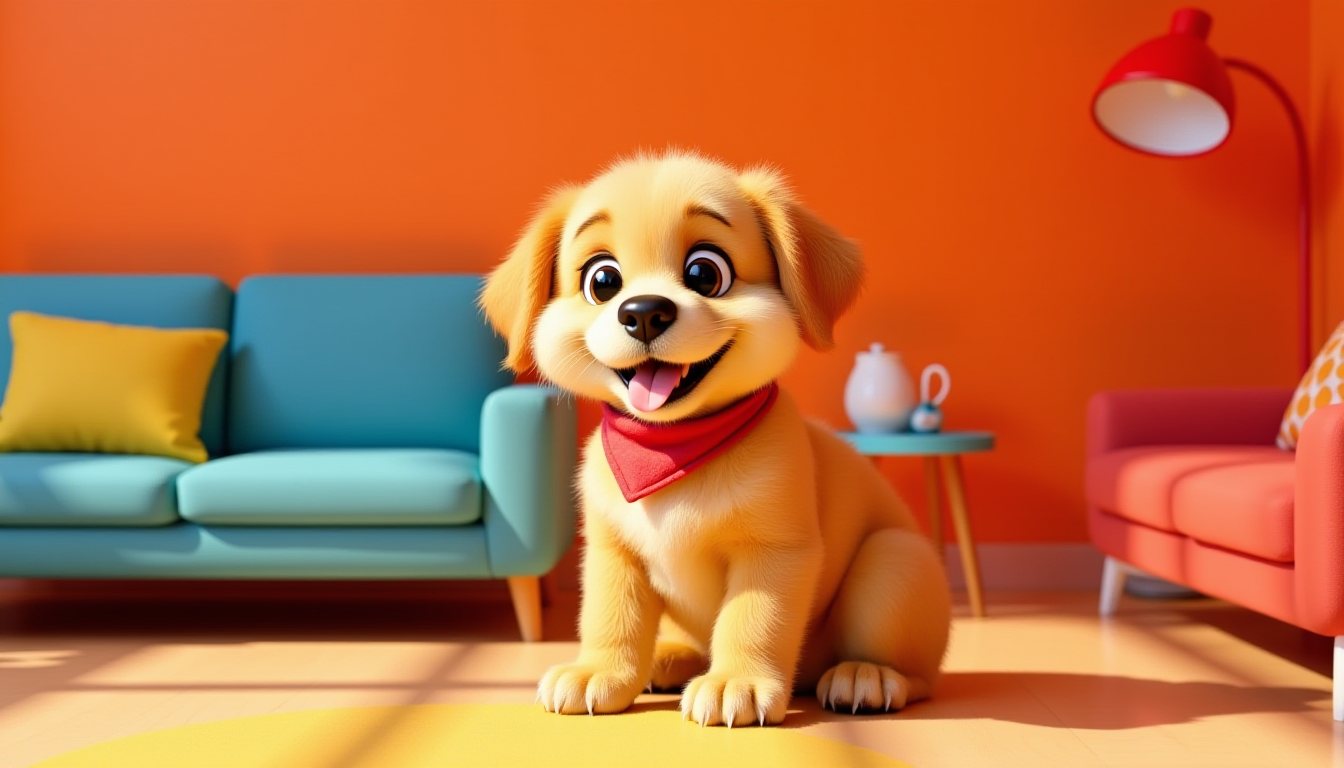

In [21]:
out[0]

In [18]:
control_1.size

(1344, 768)

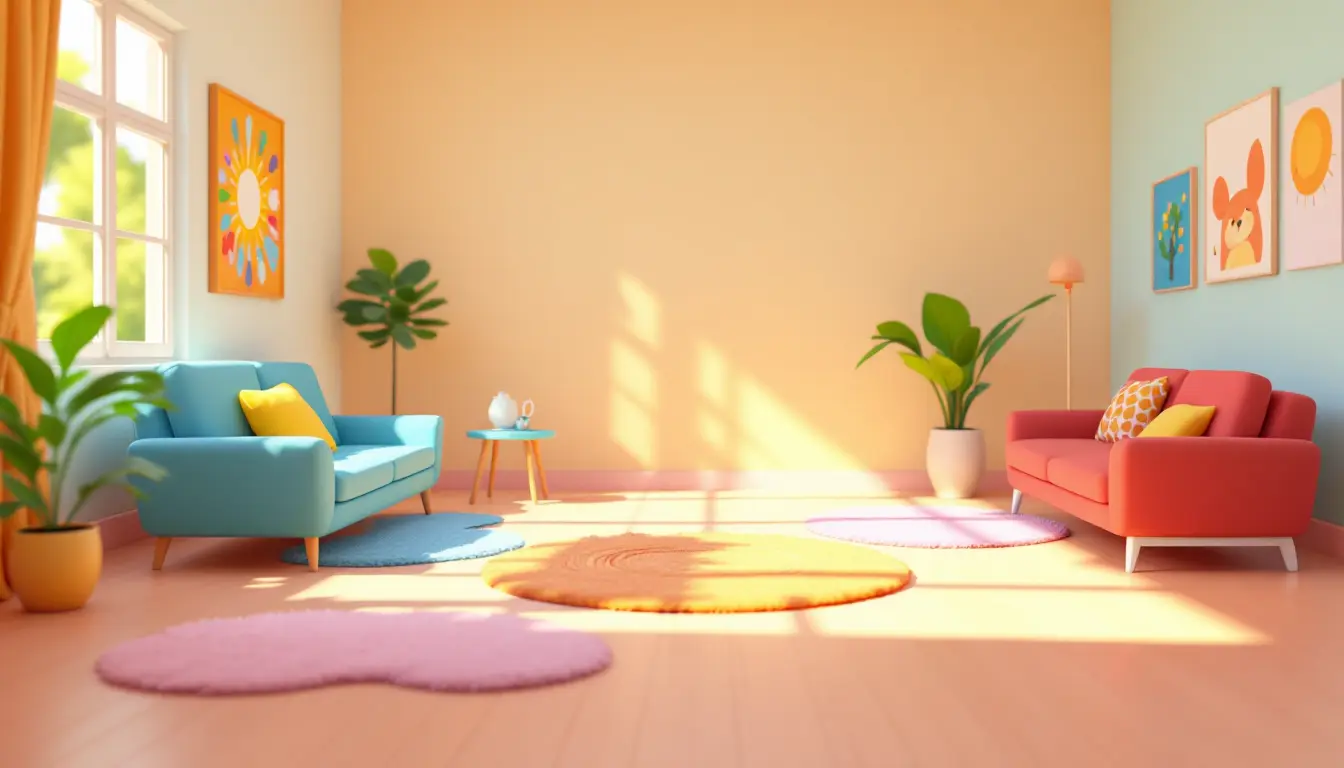

In [19]:
control_1

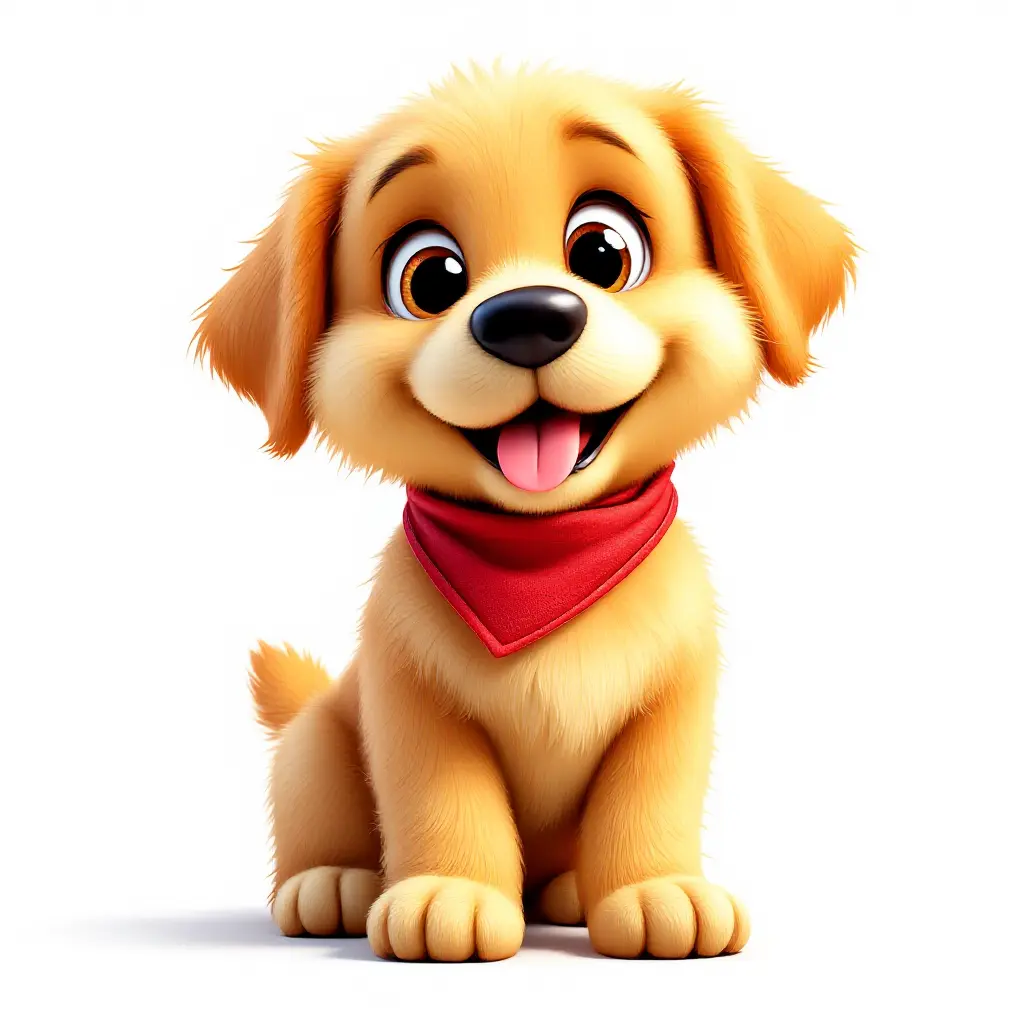

In [14]:
control_2